In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

import os

/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# set the working directory

indir = "/Volumes/data/data/seaflow/refilter/"
cruise = 'Tokyo_2'

# open the sqlite db
dbfile = '%s%s/%s.db' % (indir, cruise, cruise)

db = sqlite3.connect(dbfile)
filt = pd.read_sql_query("SELECT * from filter", db)

# find the newest filter id
filtid = filt['id'][len(filt)-1]

opp = pd.read_sql_query("SELECT * from opp", db)
opp = opp.loc[opp['filter_id']== filtid]


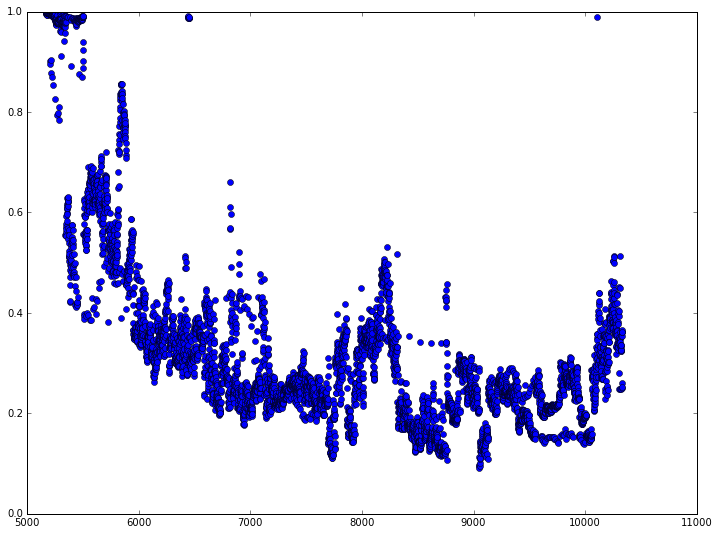

In [3]:
# make a plot of the evt/total particles
fig = plt.figure(1, figsize=(12,9))

plt.plot(opp['evt_count']/opp['all_count'],'o')
plt.show()

In [4]:
# fit a line to the evt/total ratio
# find 95% CI envelope and exclude data outside that envelope